###### Medical Insurance Cost Prediction

About The Dataset-

- age: Age Of Primary Beneficiary

- sex: Insurance Contractor Gender, Female, Male

- bmi: Body Mass Index, Providing An Understanding Of Body, Weights That Are Relatively High Or Low Relative To Height,
  Objective Index Of Body Weight (kg / m ^ 2) Using The Ratio Of Height To Weight, Ideally 18.5 To 24.9

- children: Number Of Children Covered By Health iInsurance / Number Of Dependents

- smoker: Smoking

- region: The Beneficiary's Residential Area In USA, NorthEast, SouthEast, SouthWest, NorthWest.

- charges: Individual Medical Costs Billed By Health Insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

##### Importing The Dataset Into A Data Frame

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Shaping The Data

In [3]:
data.shape

(1338, 7)

##### Information About The Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Checking For Null Values In The Dataset

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Value Count Of The Dataset by SEX

In [6]:
data.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

##### Value Count Of The Dataset by REGION

In [7]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

##### LabelEncoder

In [8]:
encoder = LabelEncoder()

##### Encoding Labels

In [9]:
labels = encoder.fit_transform(data.sex)

##### Label = SEX

In [10]:
data['sex'] = labels

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


SEX

- MALE -> 1
- FEMALE -> 0

In [12]:
labels = encoder.fit_transform(data.region)

##### Label = REGION

In [13]:
data['region'] = labels

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520


REGION

- Northeast -> 0
- Northwest -> 1
- Southeast -> 2
- Southwest -> 3

In [15]:
labels = encoder.fit_transform(data.smoker)

##### Label = SMOKER

In [16]:
data['smoker'] = labels

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


SMOKER 

- Yes -> 1
- No -> 0

##### Splitting The Parameters And Target Variable

In [18]:
X = data.drop(columns='charges',axis=1)
Y = data['charges']

#### Train Test Split The Dataset

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### Model

In [21]:
model = RandomForestRegressor()

In [22]:
model.fit(X_train.values,Y_train)

RandomForestRegressor()

#### Testing The Prediction

In [23]:
testing_data_prediction = model.predict(X_test.values)

#### Accuracy Score

In [24]:
score = metrics.r2_score(Y_test,testing_data_prediction)
score

0.8452692570969305

#### Building The Prediction System

In [25]:
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [17098.6554108]


In [26]:
import pickle

filename = 'Medical-Insurance-Cost-Prediction.sav'
pickle.dump(model, open(filename,'wb')) 

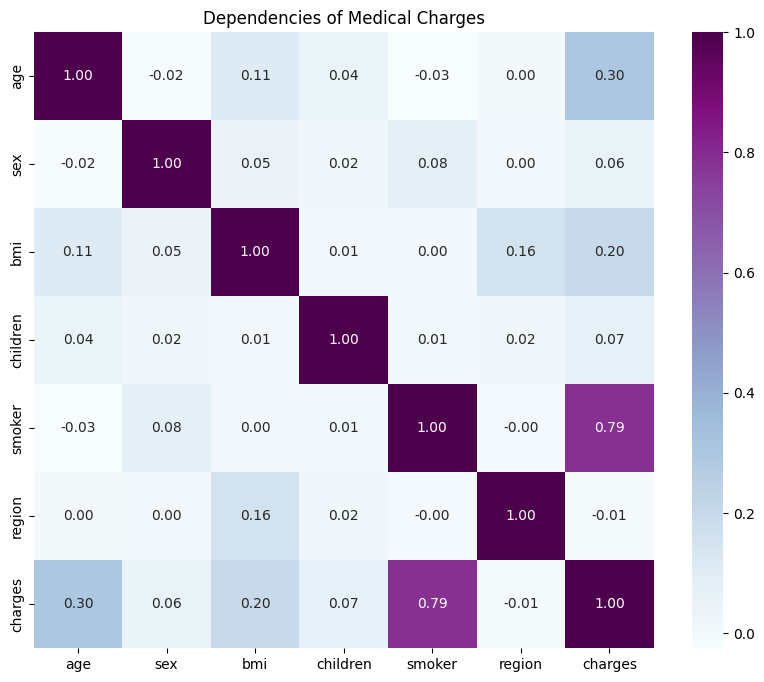

In [27]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

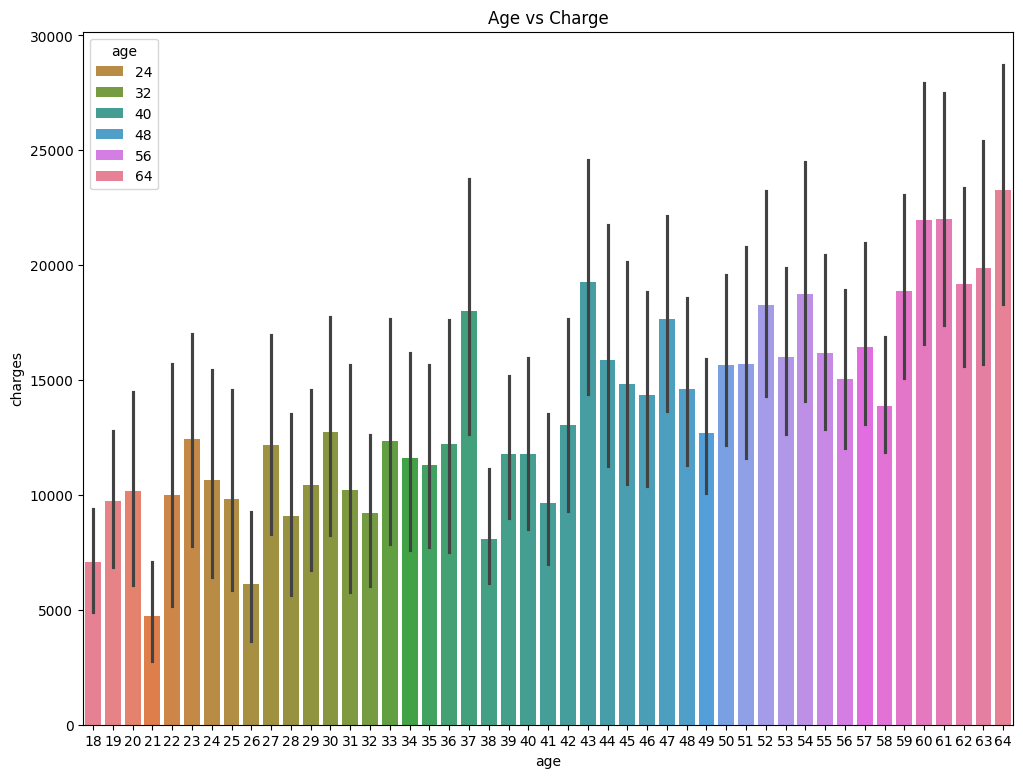

In [28]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',hue='age',data=data,palette='husl')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

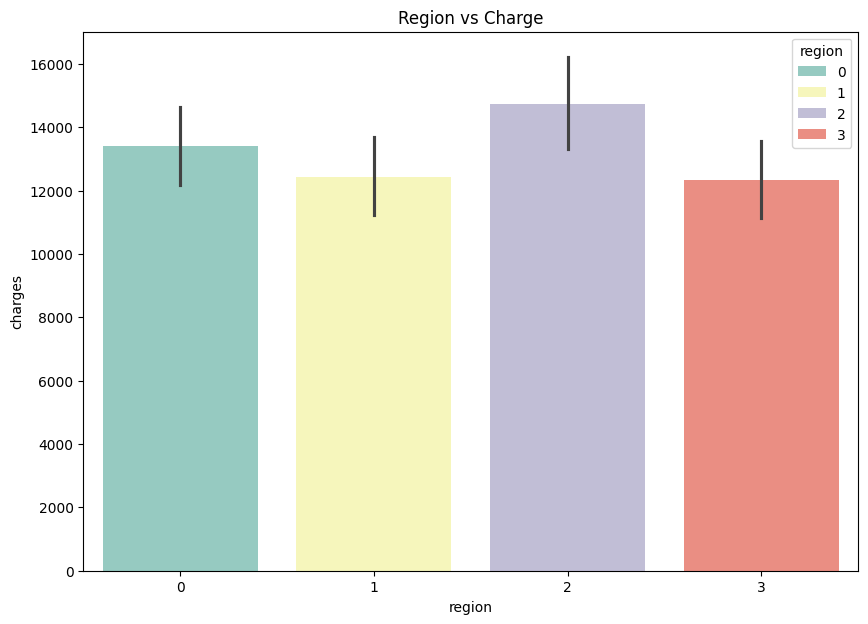

In [29]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',hue= 'region',data=data,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

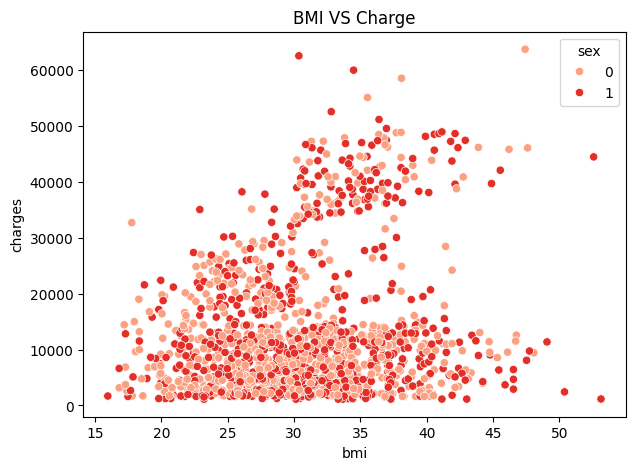

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

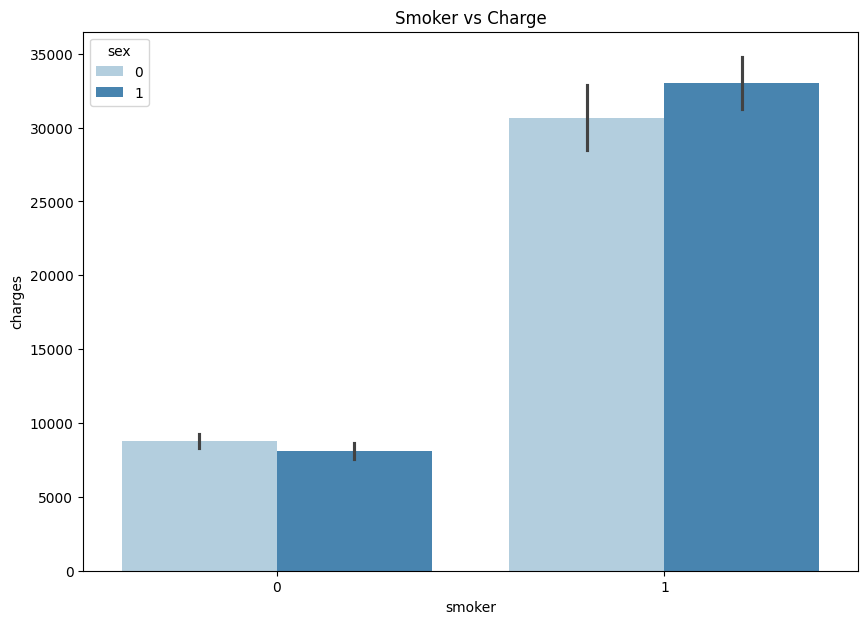

In [31]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

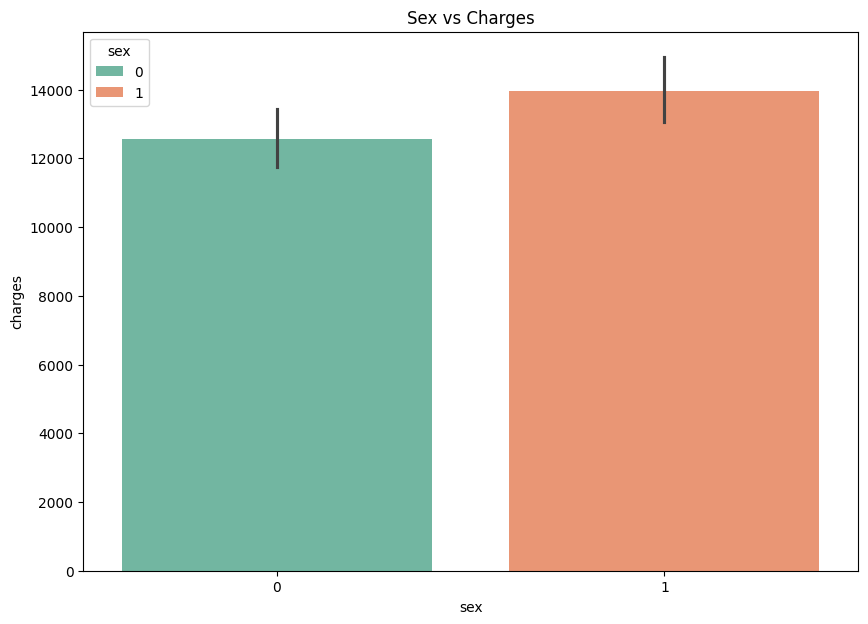

In [32]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',hue="sex",data=data,palette='Set2')

In [33]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data[col].skew(),data[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness -0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.328
charges : Skewness 1.516 and  Kurtosis 1.606


Text(0, 0.5, 'Count')

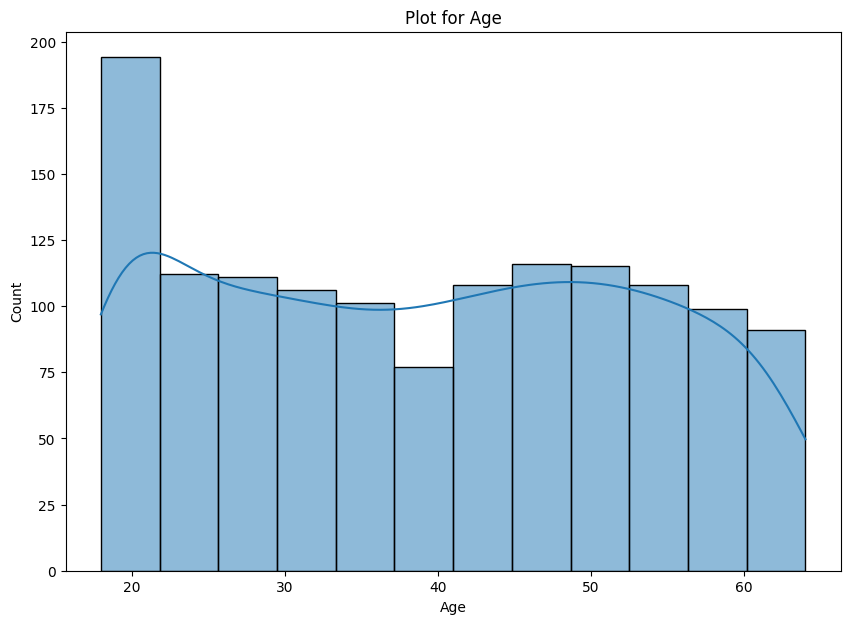

In [34]:
plt.figure(figsize=(10,7))
sns.histplot(data['age'],kde=True)
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

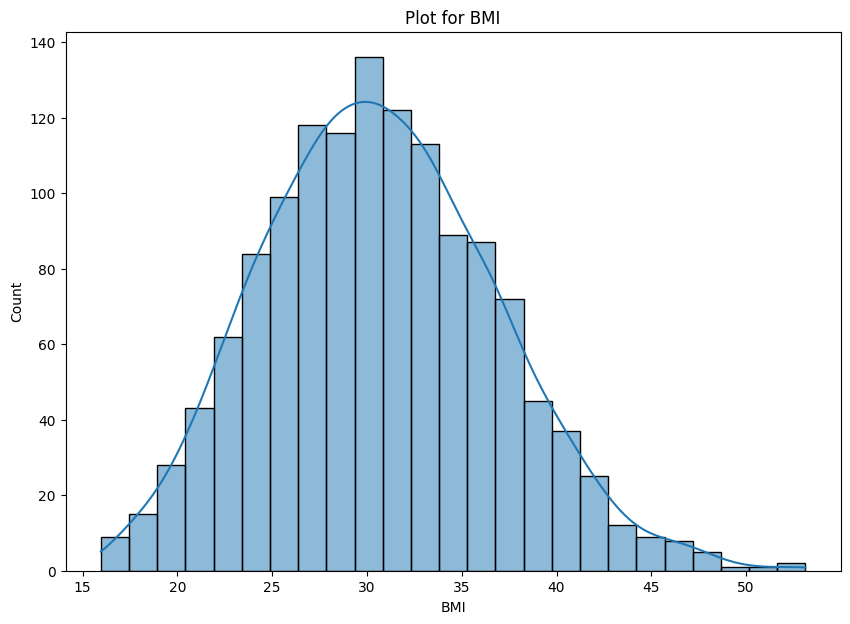

In [35]:
plt.figure(figsize=(10,7))
sns.histplot(data['bmi'],kde=True)
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

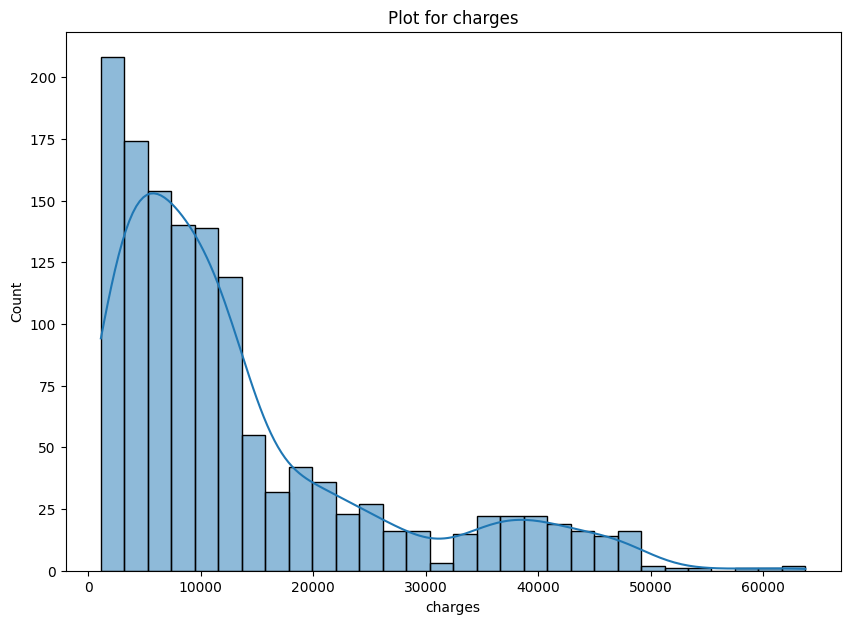

In [36]:
plt.figure(figsize=(10,7))
sns.histplot(data['charges'],kde=True)
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

##### Insurance Price Prediction Project by YoMee